In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [49]:
df = pd.read_csv("data/combo_dk.txt", delimiter=":")
df.head()

,username,password
0,kennethfaab@sol.dk,irTXiU
1,rico@sacrificial.dk,210374
2,bstadler@inano.au.dk,stadler99
3,smb@horsens.advodan.dk,QD0zvm
4,klos@hth.dk,70s3nq


In [50]:
df = df.dropna()
df = df.drop_duplicates()

In [51]:
df.isna().sum()


username    0
password    0
dtype: int64

In [58]:
df.describe(include = [object])

,username,password,domain
count,113048,113048,113048
unique,110248,27652,7288
top,noaoo@mailme.dk,danmark,mail.dk
freq,97,2004,88684


In [79]:
df.describe()

,pass_len
count,113048.000000
mean,8.998107
std,2.536410
min,5.000000
25%,7.000000
50%,9.000000
75%,10.000000
max,29.000000


In [53]:
df["pass_len"] = df["password"].apply(lambda x:len(str(x)))
df.head()

,username,password,pass_len
0,kennethfaab@sol.dk,irTXiU,6
1,rico@sacrificial.dk,210374,6
2,bstadler@inano.au.dk,stadler99,9
3,smb@horsens.advodan.dk,QD0zvm,6
4,klos@hth.dk,70s3nq,6


In [54]:
df["domain"] = df["username"].apply(lambda x: str(x).split("@")[1])
df.head()

,username,password,pass_len,domain
0,kennethfaab@sol.dk,irTXiU,6,sol.dk
1,rico@sacrificial.dk,210374,6,sacrificial.dk
2,bstadler@inano.au.dk,stadler99,9,inano.au.dk
3,smb@horsens.advodan.dk,QD0zvm,6,horsens.advodan.dk
4,klos@hth.dk,70s3nq,6,hth.dk


In [55]:
w_cloud = WordCloud(collocations=False, background_color="white").generate(" ".join(pas for pas in df.password))

(-0.5, 399.5, 199.5, -0.5)

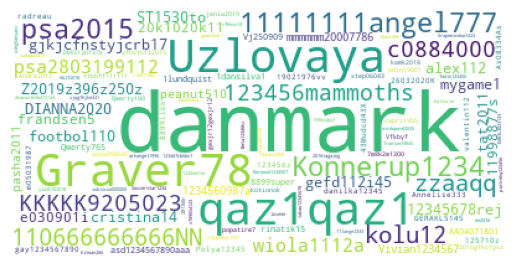

In [56]:
plt.imshow(w_cloud)
plt.axis("off")

In [71]:
frequencies, bins = np.histogram(df.pass_len, bins=15)

(4.0, 15.0)

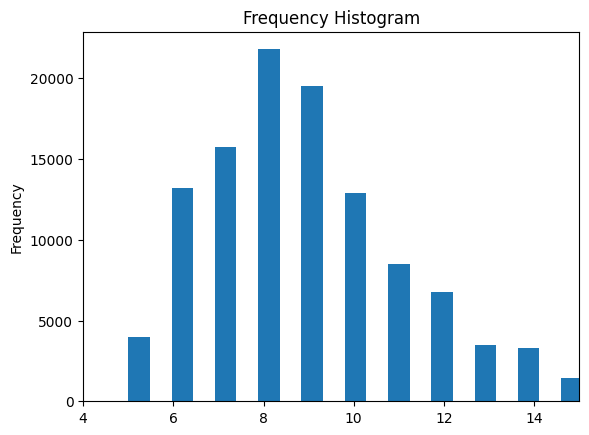

In [83]:
plt.hist(df.pass_len, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
plt.xlim([4,15])